# Fine-Tuning P.1203 Model

# ITU-T P.1203

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from itu_p1203 import P1203Standalone
from itu_p1203 import P1203Pq
from itu_p1203 import P1203Pa
from itu_p1203 import P1203Pv
from itertools import permutations

import json


/home/shivi/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
f = open("./mode0-newtests.json")
input_data = json.load(f)
input_data

{'I11': {'segments': [], 'streamId': 42},
 'I13': {'segments': [{'bitrate': 691.72,
    'codec': 'h264',
    'start': 0,
    'duration': 20,
    'fps': 25.0,
    'resolution': '1920x1080'}],
  'streamId': 42},
 'I23': {'stalling': [], 'streamId': 42},
 'IGen': {'device': 'pc',
  'displaySize': '1920x1080',
  'viewingDistance': '200cm'}}

In [3]:
#bitratesMbps = {
#    'BlueSpin': {'r01': 1.75, 'r02': 2.29, 'r03': 3.17, 'r04': 7.53, 'r05': 12.62},
#    'CasualSquat':  {'r01': 2.50, 'r02': 3.91, 'r03': 6.66, 'r04': 19.51, 'r05': 31.11},
#    'ReadyForWinter':  {'r01': 1.97, 'r02': 2.58, 'r03': 3.61, 'r04': 9.34, 'r05': 16.59},
#    'FlowerDance':  {'r01': 2.66, 'r02': 4.24, 'r03': 7.12, 'r04': 22.81, 'r05': 39.35},
#}

bitrates_kbps_new = {
    'BlueSpin': {'r01': 14000.33, 'r02': 18358.77, 'r03': 25381.74, 'r04': 60218.56, 'r05': 100957.13},
    'CasualSquat':  {'r01': 20028.41, 'r02': 31350.91, 'r03': 53280.41, 'r04': 156102.30, 'r05': 248934.89},
    'ReadyForWinter': { 'r01': 15823.20, 'r02': 20687.30, 'r03': 28919.76, 'r04': 74742.73, 'r05': 132748.28 },
    'FlowerDance': { 'r01': 21305.45,  'r02': 33934.77,  'r03': 57028.55, 'r04': 182492.95, 'r05': 314833.07}
}

resolution_map = {
    'r01': '640x360', # worse than 420p
    'r02': '852x480', # exactly 480p
    'r03': '1192x672', # bit worse than 720p
    'r04': '1533x864', # a bit better than 720p
    'r05': '1920x1080', # exactly 1080p

}

In [4]:
p1203_results = {
    'object': [],
    'qual': [],
    'bitrate': [],
    'p1203_qoe': []
}

for video in list(bitrates_kbps_new.keys()):
    bitrates = list(bitrates_kbps_new[video].values())
    qualities = list(bitrates_kbps_new[video].keys())
    
    for bitrate, quality in zip(bitrates, qualities):
        p1203_results['object'].append(video)
        p1203_results['qual'].append(quality)
        p1203_results['bitrate'].append(bitrate)

        input_data['I13']['segments'][0]['bitrate'] = bitrate
        input_data['I13']['segments'][0]['resolution'] = resolution_map[quality]
        # print(input_data)
        p1203_results['p1203_qoe'].append(P1203Standalone(input_data).calculate_complete()['O46'])

p1203_results

{'object': ['BlueSpin',
  'BlueSpin',
  'BlueSpin',
  'BlueSpin',
  'BlueSpin',
  'CasualSquat',
  'CasualSquat',
  'CasualSquat',
  'CasualSquat',
  'CasualSquat',
  'ReadyForWinter',
  'ReadyForWinter',
  'ReadyForWinter',
  'ReadyForWinter',
  'ReadyForWinter',
  'FlowerDance',
  'FlowerDance',
  'FlowerDance',
  'FlowerDance',
  'FlowerDance'],
 'qual': ['r01',
  'r02',
  'r03',
  'r04',
  'r05',
  'r01',
  'r02',
  'r03',
  'r04',
  'r05',
  'r01',
  'r02',
  'r03',
  'r04',
  'r05',
  'r01',
  'r02',
  'r03',
  'r04',
  'r05'],
 'bitrate': [14000.33,
  18358.77,
  25381.74,
  60218.56,
  100957.13,
  20028.41,
  31350.91,
  53280.41,
  156102.3,
  248934.89,
  15823.2,
  20687.3,
  28919.76,
  74742.73,
  132748.28,
  21305.45,
  33934.77,
  57028.55,
  182492.95,
  314833.07],
 'p1203_qoe': [3.5852729216386914,
  4.385774763876961,
  4.837058584633231,
  4.902406042629377,
  4.895940183337771,
  3.606240011756261,
  4.418384824796811,
  4.837058584633231,
  4.895940183337771,
  

In [5]:
p1203_df = pd.DataFrame.from_dict(p1203_results)
p1203_df

,object,qual,bitrate,p1203_qoe
0,BlueSpin,r01,14000.33,3.585273
1,BlueSpin,r02,18358.77,4.385775
2,BlueSpin,r03,25381.74,4.837059
3,BlueSpin,r04,60218.56,4.902406
4,BlueSpin,r05,100957.13,4.895940
5,CasualSquat,r01,20028.41,3.606240
6,CasualSquat,r02,31350.91,4.418385
7,CasualSquat,r03,53280.41,4.837059
8,CasualSquat,r04,156102.30,4.895940
9,CasualSquat,r05,248934.89,4.895940


In [6]:
p1203_df_1 = p1203_df.loc[p1203_df['object'].isin(['BlueSpin', 'CasualSquat'])]
grouped_p1203_qoe = p1203_df_1.groupby(['object', 'qual'],as_index=False)
grouped_p1203_qoe = grouped_p1203_qoe.mean()
grouped_p1203_qoe


,object,qual,bitrate,p1203_qoe
0,BlueSpin,r01,14000.33,3.585273
1,BlueSpin,r02,18358.77,4.385775
2,BlueSpin,r03,25381.74,4.837059
3,BlueSpin,r04,60218.56,4.902406
4,BlueSpin,r05,100957.13,4.895940
5,CasualSquat,r01,20028.41,3.606240
6,CasualSquat,r02,31350.91,4.418385
7,CasualSquat,r03,53280.41,4.837059
8,CasualSquat,r04,156102.30,4.895940
9,CasualSquat,r05,248934.89,4.895940


In [7]:
p1203_qoe = list(grouped_p1203_qoe['p1203_qoe'])
p1203_qoe

[3.5852729216386914,
 4.385774763876961,
 4.837058584633231,
 4.902406042629377,
 4.895940183337771,
 3.606240011756261,
 4.418384824796811,
 4.837058584633231,
 4.895940183337771,
 4.895940183337771]

In [8]:
import pandas as pd
import numpy as np
# get input data
ground_truth_df = pd.read_csv('./results/new-tests/individual_opinion_score_vpcc.csv')
ground_truth_df

,ID,objects,rate
0,1,BlueSpin_VPCC_r01_d200,1
1,1,FlowerDance_VPCC_r03_d200,2
2,1,ReadyForWinter_VPCC_r03_d200,3
3,1,BlueSpin_VPCC_r05_d200,3
4,1,ReadyForWinter_VPCC_r05_d200,3
...,...,...,...
815,41,FlowerDance_VPCC_r01_d200,2
816,41,BlueSpin_VPCC_r01_d200,2
817,41,BlueSpin_VPCC_r02_d200,2
818,41,ReadyForWinter_VPCC_r03_d200,4


In [9]:
ground_truth_df[['object', 'encoder', 'qual', 'dist']] = ground_truth_df.objects.str.split('_', expand=True)
#df['object'] = df['object'].str.lower()
ground_truth_df['rate_scaled'] = ground_truth_df['rate'] # no need to scale it since this time we took 1-5 results
ground_truth_df

,ID,objects,rate,object,encoder,qual,dist,rate_scaled
0,1,BlueSpin_VPCC_r01_d200,1,BlueSpin,VPCC,r01,d200,1
1,1,FlowerDance_VPCC_r03_d200,2,FlowerDance,VPCC,r03,d200,2
2,1,ReadyForWinter_VPCC_r03_d200,3,ReadyForWinter,VPCC,r03,d200,3
3,1,BlueSpin_VPCC_r05_d200,3,BlueSpin,VPCC,r05,d200,3
4,1,ReadyForWinter_VPCC_r05_d200,3,ReadyForWinter,VPCC,r05,d200,3
...,...,...,...,...,...,...,...,...
815,41,FlowerDance_VPCC_r01_d200,2,FlowerDance,VPCC,r01,d200,2
816,41,BlueSpin_VPCC_r01_d200,2,BlueSpin,VPCC,r01,d200,2
817,41,BlueSpin_VPCC_r02_d200,2,BlueSpin,VPCC,r02,d200,2
818,41,ReadyForWinter_VPCC_r03_d200,4,ReadyForWinter,VPCC,r03,d200,4


In [10]:
ground_truth_df = ground_truth_df.loc[ground_truth_df['object'].isin(['BlueSpin', 'CasualSquat'])]
grouped_ground_truth = ground_truth_df.groupby(['object', 'qual'],as_index=False)
grouped_ground_truth = grouped_ground_truth.mean(numeric_only=True)
grouped_ground_truth

,object,qual,ID,rate,rate_scaled
0,BlueSpin,r01,21.0,1.439024,1.439024
1,BlueSpin,r02,21.0,2.097561,2.097561
2,BlueSpin,r03,21.0,2.658537,2.658537
3,BlueSpin,r04,21.0,3.268293,3.268293
4,BlueSpin,r05,21.0,3.341463,3.341463
5,CasualSquat,r01,21.0,1.853659,1.853659
6,CasualSquat,r02,21.0,2.585366,2.585366
7,CasualSquat,r03,21.0,2.780488,2.780488
8,CasualSquat,r04,21.0,3.414634,3.414634
9,CasualSquat,r05,21.0,3.609756,3.609756


In [11]:
qoe_ground_truth = list(grouped_ground_truth['rate'])
qoe_ground_truth

[1.4390243902439024,
 2.097560975609756,
 2.658536585365854,
 3.268292682926829,
 3.341463414634146,
 1.853658536585366,
 2.5853658536585367,
 2.7804878048780486,
 3.4146341463414633,
 3.6097560975609757]

Text(0, 0.5, 'P1203 Mode 0')

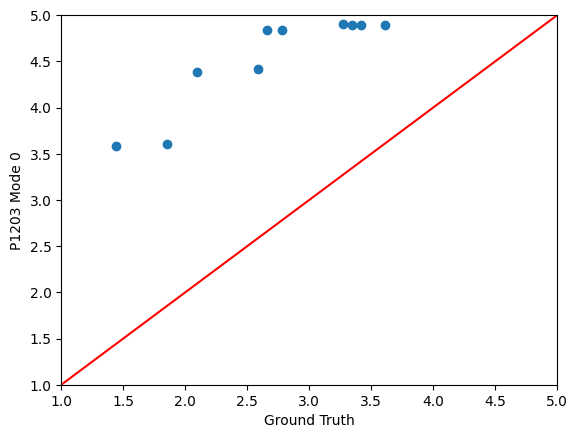

In [12]:
plt.scatter(qoe_ground_truth, p1203_qoe)
plt.plot([1, 5], [1, 5], color = 'red')
plt.axis([1, 5, 1, 5])
plt.xlabel("Ground Truth")
plt.ylabel("P1203 Mode 0")

In [13]:
df_correlation = pd.DataFrame({'Ground truth': qoe_ground_truth,
                              'P.1203': p1203_qoe})
df_correlation

test_qoe_ground_truth = [4.21875,
 4.75,
 5.15625,
 4.625,
 5.96875,
 6.21875,
 5.09375,
 6.3125,
 7.03125,
 4.53125,
 5.21875,
 5.59375,
 5.125,
 6.90625,
 7.09375,
 5.125,
 7.34375,
 7.53125]

test_qoe_ground_truth =  [x / 2 for x in test_qoe_ground_truth]
print(test_qoe_ground_truth)

test_p1203_qoe = [2.067707430097269,
 2.735910748003709,
 3.3291280769977227,
 2.2938981172480712,
 3.3228979208730216,
 4.0069219540531735,
 2.3951564121663056,
 3.4897427676994512,
 4.429231065829803,
 1.9287417775102602,
 2.360673393290387,
 2.9550604549395145,
 2.1147890720698115,
 2.719959848601501,
 3.343251224461239,
 2.2681750541276764,
 2.936964875013033,
 3.9455523161635666]

test_df_correlation = pd.DataFrame({'Ground truth': test_qoe_ground_truth,
                              'P.1203': test_p1203_qoe})
test_df_correlation

spear_corr = test_df_correlation.corr(method = 'spearman') #spearman
print("Spearmann")
print(spear_corr)


[2.109375, 2.375, 2.578125, 2.3125, 2.984375, 3.109375, 2.546875, 3.15625, 3.515625, 2.265625, 2.609375, 2.796875, 2.5625, 3.453125, 3.546875, 2.5625, 3.671875, 3.765625]
Spearmann
              Ground truth    P.1203
Ground truth      1.000000  0.772328
P.1203            0.772328  1.000000


Spearmann
              Ground truth    P.1203
Ground truth      1.000000  0.910877
P.1203            0.910877  1.000000


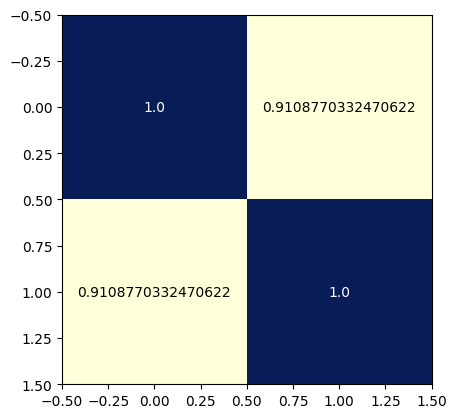

Pearson
              Ground truth    P.1203
Ground truth      1.000000  0.904375
P.1203            0.904375  1.000000


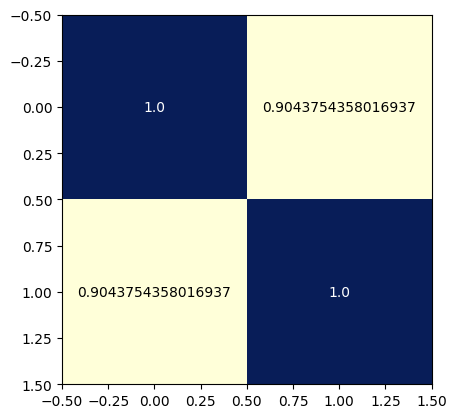

In [14]:
#import seaborn as sns
df_correlation = pd.DataFrame({'Ground truth': qoe_ground_truth,
                              'P.1203': p1203_qoe})




spear_corr = df_correlation.corr(method = 'spearman') #pearson
print("Spearmann")
print(spear_corr)

#sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.imshow(spear_corr, cmap='YlGnBu')

plt.text(0, 0, spear_corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
plt.text(1, 0, spear_corr['Ground truth']['P.1203'], ha = "center", va = "center", color = "black")
plt.text(0, 1, spear_corr['P.1203']['Ground truth'], ha = "center", va = "center", color = "black")
plt.text(1, 1, spear_corr['P.1203']['P.1203'], ha = "center", va = "center", color = "w")

plt.savefig("./figures/correlation_spearman_1203_1080p_" + "groundtruth" + "compeq.pdf")
plt.show()

pearson_corr = df_correlation.corr(method = 'pearson') #spearman
print("Pearson")
print(pearson_corr)

#sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.imshow(pearson_corr, cmap='YlGnBu')

plt.text(0, 0, pearson_corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
plt.text(1, 0, pearson_corr['Ground truth']['P.1203'], ha = "center", va = "center", color = "black")
plt.text(0, 1, pearson_corr['P.1203']['Ground truth'], ha = "center", va = "center", color = "black")
plt.text(1, 1, pearson_corr['P.1203']['P.1203'], ha = "center", va = "center", color = "w")

plt.savefig("./figures/correlation_pearson_1203_1080p" + "groundtruth" + "_compeq.pdf")
plt.show()



# P1203.1 Pv coefficients updates


In [15]:
# Quant(a1, a2, a3, a4) = a1 + a2*ln(a3+ln(bitrate) + ln(br*br/(codRes*fr) + a4))

# MOSq(q1, q2, q3) = q1 + q2*exp(q3*Quant)
# MOSq = max(min(MOSq, 5), 1)

# Dq = max(min(100 - RfromMOS(MOSq), 100), 0)

# MOSfromR:
#     MOS = MOS_min + (MOS_max - MOS_min) * R/100 + R*(R-60)(100-R)*0.000007
#     MOS = min(MOS_max, max(MOS, MOS_min))
#     Calculate MOSfromR, R from 0 -> 100, step 0.25

In [16]:
from functools import lru_cache
from itertools import permutations
import json
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from itu_p1203 import P1203Standalone
from itu_p1203 import P1203Pv


In [17]:
f = open("./mode0-newtests.json")
input_data = json.load(f)
# input_data

In [18]:
ground_truth_qoe_df = pd.read_csv('./results/new-tests/individual_opinion_score_vpcc.csv')
ground_truth_qoe_df[['object', 'encoder', 'qual', 'dist']] = ground_truth_qoe_df.objects.str.split('_', expand=True)
ground_truth_qoe_df['rate_scaled'] = ground_truth_qoe_df['rate']

ground_truth_qoe_df

,ID,objects,rate,object,encoder,qual,dist,rate_scaled
0,1,BlueSpin_VPCC_r01_d200,1,BlueSpin,VPCC,r01,d200,1
1,1,FlowerDance_VPCC_r03_d200,2,FlowerDance,VPCC,r03,d200,2
2,1,ReadyForWinter_VPCC_r03_d200,3,ReadyForWinter,VPCC,r03,d200,3
3,1,BlueSpin_VPCC_r05_d200,3,BlueSpin,VPCC,r05,d200,3
4,1,ReadyForWinter_VPCC_r05_d200,3,ReadyForWinter,VPCC,r05,d200,3
...,...,...,...,...,...,...,...,...
815,41,FlowerDance_VPCC_r01_d200,2,FlowerDance,VPCC,r01,d200,2
816,41,BlueSpin_VPCC_r01_d200,2,BlueSpin,VPCC,r01,d200,2
817,41,BlueSpin_VPCC_r02_d200,2,BlueSpin,VPCC,r02,d200,2
818,41,ReadyForWinter_VPCC_r03_d200,4,ReadyForWinter,VPCC,r03,d200,4


In [19]:
ground_truth_qoe_df = ground_truth_qoe_df[['object', 'qual', 'rate_scaled']]
ground_truth_qoe_df

,object,qual,rate_scaled
0,BlueSpin,r01,1
1,FlowerDance,r03,2
2,ReadyForWinter,r03,3
3,BlueSpin,r05,3
4,ReadyForWinter,r05,3
...,...,...,...
815,FlowerDance,r01,2
816,BlueSpin,r01,2
817,BlueSpin,r02,2
818,ReadyForWinter,r03,4


In [20]:
# remove outliers using boxplot method
vpcc_group_columns = ['object', 'qual']
configurations = ground_truth_qoe_df.groupby(vpcc_group_columns,as_index=False)

def boxplot_outlier_filter(frame):
    """
    Outlier filter using interquantile range (filter below Q1 - 1.5 IQR and above Q3 + 1.5 IQR)

    :param frame: data frame
    :return: filtered frame
    """
    q1 = frame.quantile(0.25, numeric_only=True)["rate_scaled"]
    q3 = frame.quantile(0.75, numeric_only=True)["rate_scaled"]
    
    # interquantile range
    iqr = q3 - q1
    fence_low = q1 - (1.5*iqr)
    fence_high = q3 + (1.5*iqr)
    filtered = (frame["rate_scaled"] >= fence_low) & (frame["rate_scaled"] <= fence_high)
    return frame.loc[filtered]

# for each configuration, filter outliers
df_vpcc_filtered = None
for _, frame in configurations:
    #print(boxplot_outlier_filter(frame))
    df_vpcc_filtered = pd.concat([df_vpcc_filtered, boxplot_outlier_filter(frame)], axis=0)

df_vpcc_filtered = df_vpcc_filtered.reset_index(drop=True)
# groups = df_vpcc_filtered.groupby(vpcc_group_columns,as_index=False)


In [21]:
ground_truth_qoe_df = df_vpcc_filtered.loc[df_vpcc_filtered['object'].isin(['BlueSpin', 'CasualSquat'])]
ground_truth_qoe_grouped_df = ground_truth_qoe_df.groupby(['object', 'qual'], as_index=False).aggregate(lambda x: tuple(x))
ground_truth_qoe_grouped_df

,object,qual,rate_scaled
0,BlueSpin,r01,"(1, 2, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, ..."
1,BlueSpin,r02,"(2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ..."
2,BlueSpin,r03,"(2, 3, 2, 2, 3, 3, 2, 4, 2, 2, 3, 4, 2, 3, 3, ..."
3,BlueSpin,r04,"(3, 4, 2, 2, 5, 3, 4, 5, 3, 4, 3, 4, 3, 3, 5, ..."
4,BlueSpin,r05,"(3, 4, 2, 3, 4, 4, 4, 5, 3, 3, 4, 3, 3, 4, 4, ..."
5,CasualSquat,r01,"(1, 2, 2, 2, 3, 2, 1, 2, 1, 1, 3, 2, 3, 1, 2, ..."
6,CasualSquat,r02,"(2, 3, 1, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 2, 3, ..."
7,CasualSquat,r03,"(2, 3, 2, 3, 4, 3, 2, 2, 2, 2, 4, 3, 2, 4, 3, ..."
8,CasualSquat,r04,"(2, 4, 3, 3, 3, 4, 4, 4, 2, 2, 4, 3, 2, 3, 5, ..."
9,CasualSquat,r05,"(3, 4, 3, 3, 4, 4, 2, 4, 3, 4, 4, 4, 2, 3, 4, ..."


In [22]:
#bitratesMbps = {
#    'BlueSpin': {'r01': 1.75, 'r02': 2.29, 'r03': 3.17, 'r04': 7.53, 'r05': 12.62},
#    'CasualSquat':  {'r01': 2.50, 'r02': 3.91, 'r03': 6.66, 'r04': 19.51, 'r05': 31.11},
#    'ReadyForWinter':  {'r01': 1.97, 'r02': 2.58, 'r03': 3.61, 'r04': 9.34, 'r05': 16.59},
#    'FlowerDance':  {'r01': 2.66, 'r02': 4.24, 'r03': 7.12, 'r04': 22.81, 'r05': 39.35},
#}

bitrates_kbps_new = {
    'BlueSpin': {'r01': 14000.33, 'r02': 18358.77, 'r03': 25381.74, 'r04': 60218.56, 'r05': 100957.13},
    'CasualSquat':  {'r01': 20028.41, 'r02': 31350.91, 'r03': 53280.41, 'r04': 156102.30, 'r05': 248934.89},
    'ReadyForWinter': { 'r01': 15823.20, 'r02': 20687.30, 'r03': 28919.76, 'r04': 74742.73, 'r05': 132748.28 },
    'FlowerDance': { 'r01': 21305.45,  'r02': 33934.77,  'r03': 57028.55, 'r04': 182492.95, 'r05': 314833.07}
}
resolution_map = {
    'r01': '640x360', # worse than 480p
    'r02': '852x480', # exactly 480p
    'r03': '1192x672', # bit worse than 720p
    'r04': '1533x864', # a bit better than 720p
    'r05': '1920x1080', # exactly 1080p

}

In [23]:
def calculate_p1203(current_coeffs):

    p1203_results = {
        'object': [],
        'qual': [],
        'bitrate': [],
        'p1203_qoe': []
    }

    for video in list(bitrates_kbps_new.keys()):
        bitrates = list(bitrates_kbps_new[video].values())
        qualities = list(bitrates_kbps_new[video].keys())
        
        for bitrate, quality in zip(bitrates, qualities):
            p1203_results['object'].append(video)
            p1203_results['qual'].append(quality)
            p1203_results['bitrate'].append(bitrate)

            input_data['I13']['segments'][0]['bitrate'] = bitrate
            input_data['I13']['segments'][0]['resolution'] = resolution_map[quality]

            #print("input data")
            #print(input_data)

            qoe_p1203 = P1203Standalone(input_data, coeffs=current_coeffs).calculate_complete()['O46']
            #qoe_p1203 = P1203Standalone(input_data, coeffs=_COEFFS).calculate_complete()['O46']
            #print("qoe_p1203")
            #print(qoe_p1203)
            
            p1203_results['p1203_qoe'].append(qoe_p1203)

    return p1203_results

In [24]:
def calculate_rmse(p1203_results, mos):
    # print("--p1203_results--")
    # print(p1203_results)
    # print("--mos--")
    # print(mos)
    joined_qoe = p1203_results.merge(mos)
    rmse_arr = []
    # print("--joined_qoe--")
    # print(joined_qoe)

    for idx in np.arange(joined_qoe.shape[0]):
        
        # print("--joined_qoe.shape[0]--")
        # print(joined_qoe.shape[0])
        targets = joined_qoe.iloc[idx,:]['rate_scaled']
        # print("--targets--")
        # print(targets)
        # print(len(targets))
        predictions = np.full(len(targets), joined_qoe.loc[joined_qoe.index[idx], 'p1203_qoe'])
        # print("--predictions--")
        # print(predictions)
        # print(len(predictions))
        rmse_arr.append(np.sqrt(np.mean((predictions-targets)**2)))
        # print("--rmse_arr--")
        # print(rmse_arr)
    
    return np.average(rmse_arr)


In [25]:
from datetime import datetime

_COEFFS = {
        "u1": 72.61,
        "u2": 0.32,
        "t1": 30.98,
        "t2": 1.29,
        "t3": 64.65,
        "q1": 4.66,
        "q2": -0.07,
        "q3": 4.06,
        "mode0": {
            "a1": 11.9983519,
            "a2": -2.99991847,
            "a3": 41.2475074001,
            "a4": 0.13183165961,
        },
        "mode1": {
            "a1": 5.00011566,
            "a2": -1.19630824,
            "a3": 41.3585049,
            "a4": 0,
            "c0": -0.91562479,
            "c1": 0,
            "c2": -3.28579526,
            "c3": 20.4098663,
        },
        "htv_1": -0.60293,
        "htv_2": 2.12382,
        "htv_3": -0.36936,
        "htv_4": 0.03409,
    }

def finetune_coeffs():
    min_rmse = sys.float_info.max
    optimized_coeffs = _COEFFS
    optimized_p1203_qoe  =[]

    # for _COEFFS['u1'] in np.arange(50,100):
    #     for _COEFFS['u2'] in np.arange(1):
            # for _COEFFS['t1'] in np.arange(1):
            #     for _COEFFS['t2'] in np.arange(1):
            #         for _COEFFS['t3'] in np.arange(1):
                        # for _COEFFS['q1'] in np.arange(1):
                        #     for _COEFFS['q2'] in np.arange(1):
                        #         for _COEFFS['q3'] in np.arange(1):
    for _COEFFS['mode0']['a1'] in np.arange(1, 15, 0.5): # 0.5 range originally
        for _COEFFS['mode0']['a2'] in np.arange(-5, 0, 0.5): # 0.5 range originally
            for _COEFFS['mode0']['a3'] in np.arange(0, 80, 1): # 1 range originally
                for _COEFFS['mode0']['a4'] in np.arange(0, 5, 0.5): # 0.5 range originally
                    # print(_COEFFS)

                    qoe_p1203_dict = calculate_p1203(_COEFFS)
                    p1203_df = pd.DataFrame.from_dict(qoe_p1203_dict)

                    # Fine tune aka train with BlueSpin and CasualSquat
                    p1203_df = p1203_df.loc[p1203_df['object'].isin(['BlueSpin', 'CasualSquat'])]
                    grouped_p1203_qoe = p1203_df.groupby(['object', 'qual'],as_index=False).mean()
                    #print("grouped_p1203_qoe")
                    #print(grouped_p1203_qoe)

                    print("timestamp")
                    print(datetime.now())
                    print("COEFFS: " + str(_COEFFS['mode0']['a1']) + " " + str(_COEFFS['mode0']['a2']) + " " + str(_COEFFS['mode0']['a3']) + " " + str(_COEFFS['mode0']['a4']))

                    rmse = calculate_rmse(grouped_p1203_qoe, ground_truth_qoe_grouped_df)
                    print("Calcd RMSE: " + str(rmse))
                    print("Current min RMSE: " + str(min_rmse))
                    if rmse < min_rmse:   
                        print("==> NEW MIN RMSE: " + str(rmse))
                        print("==> MIN RMSE _COEFFS: " + str(_COEFFS))
                        
                        optimized_coeffs = _COEFFS
                        min_rmse = rmse
                        optimized_p1203_qoe = list(grouped_p1203_qoe['p1203_qoe'])

    return optimized_coeffs, optimized_p1203_qoe, min_rmse

In [26]:
from scipy.optimize import minimize, Bounds, differential_evolution, basinhopping, brute, shgo, dual_annealing, direct

# objective function to minimise
def objective_function(trial_coeffs, multiplier=1):
    #print('NEW OBJECTIVE FUNCTION CALL')

    current_coeffs = _COEFFS
    # current_coeffs['u1'] = trial_coeffs[0].item()
    # current_coeffs['u2'] = trial_coeffs[1].item()
    # current_coeffs['t1'] = trial_coeffs[2].item()
    # current_coeffs['t2'] = trial_coeffs[3].item()
    # current_coeffs['t3'] = trial_coeffs[4].item()
    # current_coeffs['q1'] = trial_coeffs[5].item()
    # current_coeffs['q2'] = trial_coeffs[6].item()
    # current_coeffs['q3'] = trial_coeffs[7].item()
    # current_coeffs['mode0']['a1'] = trial_coeffs[8].item()
    # current_coeffs['mode0']['a2'] = trial_coeffs[9].item()
    # current_coeffs['mode0']['a3'] = trial_coeffs[10].item()
    # current_coeffs['mode0']['a4'] = trial_coeffs[11].item()

    current_coeffs['mode0']['a1'] = trial_coeffs[0].item()
    current_coeffs['mode0']['a2'] = trial_coeffs[1].item()
    current_coeffs['mode0']['a3'] = trial_coeffs[2].item()
    current_coeffs['mode0']['a4'] = trial_coeffs[3].item()

    qoe_p1203_dict = calculate_p1203(current_coeffs)
    p1203_df = pd.DataFrame.from_dict(qoe_p1203_dict)
    p1203_df = p1203_df.loc[p1203_df['object'].isin(['BlueSpin', 'CasualSquat'])]
    grouped_p1203_qoe = p1203_df.groupby(['object', 'qual'],as_index=False).mean()
    print("COEFFS: " + str(current_coeffs['mode0']['a1']) + " " + str(current_coeffs['mode0']['a2']) + " " + str(current_coeffs['mode0']['a3']) + " " + str(current_coeffs['mode0']['a4']))
    #print("--ground_truth_qoe_grouped_df--")
    #print(ground_truth_qoe_grouped_df)

    rmse = calculate_rmse(grouped_p1203_qoe, ground_truth_qoe_grouped_df)
    print("Calcd RMSE: " + str(rmse))
    #print("Current min RMSE: " + str(min_rmse))
    return rmse

initial_coeffs = [12,-3,41,0]

optimization_methods = ["basinhopping", "brute", "differential_evolution", "shgo", "dual_annealing", "direct"]
optimization_method = "brute"

#bounds = [(50,90), (-0,10), (20,40), (0,10), (50,70), (0,10), (-10,10), (0,10), (1,15), (-5, 5), (0, 80), (0, 5)]
bounds = [(1,15), (-5, 5), (0, 80), (0, 5)]
# bounds = [(0,100), (0,100), (0,100), (0,100)]
#bounds=[(-5,80), (-5,80), (-5,80), (-5,80)]
#bounds = [(-5,80), (-5,80), (-5,80), (-5,80),(-5,80), (-5,80), (-5,80), (-5,80),(-5,80), (-5,80), (-5,80), (-5,80)]
#bounds = Bounds(-100,100)

#result = minimize(objective_function, initial_coeffs, method='L-BFGS-B', bounds=bounds)

match optimization_method:
    case "basinhopping":
        result = basinhopping(objective_function, initial_coeffs, minimizer_kwargs={'bounds':bounds})
    case "brute":
        (x0, fval, grid, Jout) = brute(objective_function, bounds, full_output=True)
    case "differential_evolution":
        result = differential_evolution(objective_function, bounds)
    case "shgo":
        result = shgo(objective_function, bounds, sampling_method='halton')
    case "dual_annealing":
        result = dual_annealing(objective_function, bounds)
    case "direct":
        result = basinhopping(objective_function, bounds)    

COEFFS: 1.0 -5.0 0.0 0.0
Calcd RMSE: 2.040757309638076
COEFFS: 1.0 -5.0 0.0 0.2631578947368421
Calcd RMSE: 2.040757309638076
COEFFS: 1.0 -5.0 0.0 0.5263157894736842
Calcd RMSE: 2.040757309638076
COEFFS: 1.0 -5.0 0.0 0.7894736842105263
Calcd RMSE: 2.040757309638076
COEFFS: 1.0 -5.0 0.0 1.0526315789473684
Calcd RMSE: 2.040757309638076


KeyboardInterrupt: 

In [121]:
print(optimization_method)
if optimization_method == "brute":
    print("x0: " + x0)
    print("fval: " + fval)
    print("grid: " + grid)
    print("Jout: " + Jout)
else: 
    print("optimal coeffs " + optimization_method + ": " + str(result.x))
    print("objective function value " + optimization_method + ": " + str(result.fun))
    print("objective function message " + optimization_method + ": " + str(result.message))

In [122]:
#optimized_coeffs, p1203_qoe_list, min_rmse =  finetune_coeffs()
#print("timestamp")
#print(datetime.now())
#print("FINAL RESULT")
#print(optimized_coeffs, p1203_qoe_list, min_rmse)

In [123]:
#print(min_rmse)
#print(optimized_coeffs)
#print(ground_truth_qoe_df.groupby(['object', 'qual'],as_index=False).mean()['rate_scaled'])


In [124]:
#==============================================================================================================================
#FOUND THE BEST

In [125]:
ground_truth_qoe_list = list(ground_truth_qoe_df.groupby(['object', 'qual'],as_index=False).mean()['rate_scaled'])
ground_truth_qoe_list

In [126]:
#coeffs = {'u1': 72.61, 'u2': 0.32, 't1': 30.98, 't2': 1.29, 't3': 64.65, 'q1': 4.4, 'q2': -1.5, 'q3': 1.5, 'mode0': {'a1': 5, 'a2': -1.0, 'a3': 130, 'a4': 4.0}, 'mode1': {'a1': 5.00011566, 'a2': -1.19630824, 'a3': 41.3585049, 'a4': 0, 'c0': -0.91562479, 'c1': 0, 'c2': -3.28579526, 'c3': 20.4098663}, 'htv_1': -0.60293, 'htv_2': 2.12382, 'htv_3': -0.36936, 'htv_4': 0.03409}
coeffs = _COEFFS

results_file = open(optimization_method + ".txt", "a")
results_file.write(optimization_method + " results ")
results_file.write("\n")

print(optimization_method + " results ")

# results_file.write(str(result.x[0]))
# results_file.write(str(result.x[1]))
# results_file.write(str(result.x[2]))
# results_file.write(str(result.x[3]))

# print(result.x[0])
# print(result.x[1])
# print(result.x[2])
# print(result.x[3])
print(result.x)

results_file.write(str(result.x))
results_file.write("\n")
results_file.write(str(result.fun))
results_file.write("\n")


# coeffs['u1'] = result.x[0].item()
# coeffs['u2'] = result.x[1].item()
# coeffs['t1'] = result.x[2].item()
# coeffs['t2'] = result.x[3].item()
# coeffs['t3'] = result.x[4].item()
# coeffs['q1'] = result.x[5].item()
# coeffs['q2'] = result.x[6].item()
# coeffs['q3'] = result.x[7].item()
# coeffs['mode0']['a1'] = result.x[8].item()
# coeffs['mode0']['a2'] = result.x[9].item()
# coeffs['mode0']['a3'] = result.x[10].item()
# coeffs['mode0']['a4'] = result.x[11].item()

coeffs['mode0']['a1'] = result.x[0].item()
coeffs['mode0']['a2'] = result.x[1].item()
coeffs['mode0']['a3'] = result.x[2].item()
coeffs['mode0']['a4'] = result.x[3].item()

#coeffs = optimized_coeffs
print(coeffs)

qoe_p1203_dict = calculate_p1203(coeffs)
p1203_df = pd.DataFrame.from_dict(qoe_p1203_dict)

p1203_df = p1203_df.loc[p1203_df['object'].isin(['BlueSpin', 'CasualSquat'])]
grouped_p1203_qoe = p1203_df.groupby(['object', 'qual'],as_index=False).mean()
grouped_p1203_qoe

In [127]:
p1203_qoe_list = list(grouped_p1203_qoe['p1203_qoe'])
plt.scatter(ground_truth_qoe_list, p1203_qoe_list)
plt.plot([1, 5], [1, 5], color = 'red')
plt.axis([1, 5, 1, 5])
plt.xlabel("Ground Truth")
plt.ylabel("Fine-tuned P1203 Mode 0")

In [128]:
#import seaborn as sns

df_correlation = pd.DataFrame({
    "Ground truth": ground_truth_qoe_list,
    "P.1203": p1203_qoe_list
})

print("df_correlation")
print(df_correlation)

#corr_method = 'spearman'
#corr = df_correlation.corr(method=corr_method)
#sns.heatmap(corr, cmap='YlGnBu', annot = True)
#plt.savefig('./figures/correlation_heatmap_' + corr_method + '_optimized.pdf')
#plt.show()

spear_corr = df_correlation.corr(method = 'spearman') #pearson
print("Spearmann")
print(spear_corr)
print(spear_corr.shape)
print(spear_corr["Ground truth"]["P.1203"])

#sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.imshow(spear_corr, cmap='YlGnBu')

plt.text(0, 0, spear_corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
plt.text(1, 0, spear_corr['Ground truth']['P.1203'], ha = "center", va = "center", color = "black")
plt.text(0, 1, spear_corr['P.1203']['Ground truth'], ha = "center", va = "center", color = "black")
plt.text(1, 1, spear_corr['P.1203']['P.1203'], ha = "center", va = "center", color = "w")


plt.savefig("./figures/correlation_spearman_optimized_" + optimization_method + "compeq.pdf")
plt.show()

pearson_corr = df_correlation.corr(method = 'pearson') #spearman
print("Pearson")
print(pearson_corr)

#sns.heatmap(corr, cmap='YlGnBu', annot = True)
plt.imshow(pearson_corr, cmap='YlGnBu')

plt.text(0, 0, pearson_corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
plt.text(1, 0, pearson_corr['Ground truth']['P.1203'], ha = "center", va = "center", color = "black")
plt.text(0, 1, pearson_corr['P.1203']['Ground truth'], ha = "center", va = "center", color = "black")
plt.text(1, 1, pearson_corr['P.1203']['P.1203'], ha = "center", va = "center", color = "w")


plt.savefig("./figures/correlation_pearson_optimized_" + optimization_method + "compeq.pdf")
plt.show()


In [129]:
# corr_method = 'pearson'
# corr = df_correlation.corr(method=corr_method)
# sns.heatmap(corr, cmap='YlGnBu', annot = True)
# plt.savefig('./figures/correlation_heatmap_' + corr_method + '_optimized.pdf')
# plt.show()

In [130]:
#==============================================================================================================================
#VALIDATING with ReadyForWinter and FlowerDance

In [131]:
#coeffs = {'u1': 72.61, 'u2': 0.32, 't1': 30.98, 't2': 1.29, 't3': 64.65, 'q1': 4.4, 'q2': -1.5, 'q3': 1.5, 'mode0': {'a1': 5, 'a2': -1.0, 'a3': 130, 'a4': 4.0}, 'mode1': {'a1': 5.00011566, 'a2': -1.19630824, 'a3': 41.3585049, 'a4': 0, 'c0': -0.91562479, 'c1': 0, 'c2': -3.28579526, 'c3': 20.4098663}, 'htv_1': -0.60293, 'htv_2': 2.12382, 'htv_3': -0.36936, 'htv_4': 0.03409}

qoe_p1203_dict = calculate_p1203(coeffs)
qoe_p1203_df = pd.DataFrame(qoe_p1203_dict)
qoe_p1203_df = qoe_p1203_df.loc[qoe_p1203_df['object'].isin(['ReadyForWinter', 'FlowerDance'])]
                                # & ((qoe_p1203_df['qual'].isin(['r01']) & qoe_p1203_df['end_quality'].isin(['r1'])) |
                                #  (qoe_p1203_df['start_quality'].isin(['r3']) & qoe_p1203_df['end_quality'].isin(['r3'])) |
                                #  (qoe_p1203_df['start_quality'].isin(['r5']) & qoe_p1203_df['end_quality'].isin(['r5']))) ]
qoe_validation = qoe_p1203_df.groupby(['object', 'qual'],as_index=False).mean()
qoe_validation

In [132]:
# Get ground truth qoe for these sequences
ground_truth_qoe_df = df_vpcc_filtered.loc[df_vpcc_filtered['object'].isin(['ReadyForWinter', 'FlowerDance'])]
ground_truth_qoe_grouped_df = ground_truth_qoe_df.groupby(['object', 'qual'],as_index=False).aggregate(lambda x: tuple(x))
ground_truth_qoe_grouped_df

In [133]:
calculate_rmse(qoe_validation, ground_truth_qoe_grouped_df)

In [134]:
ground_truth_list = list(ground_truth_qoe_df.groupby(['object', 'qual'],as_index=False).mean()['rate_scaled'])
qoe_validation_list = list(qoe_validation['p1203_qoe'])
ground_truth_list

In [135]:
plt.scatter(ground_truth_list, qoe_validation_list)
plt.plot([1, 5], [1, 5], color='red')
plt.axis([1, 5, 1, 5])
plt.xlabel('Ground Truth')
plt.ylabel('Fine-tuned P1203 Mode 0 - Validation')
plt.show()

In [136]:
corr_method = 'spearman'
corr_df = pd.DataFrame({
    'Fine-tuned P1203': qoe_validation_list,
    'Ground truth': ground_truth_list
})

corr_methods = ['spearman', 'pearson']

for corr_method in corr_methods:
    corr = corr_df.corr(method=corr_method)
    #sns.heatmap(corr, cmap='YlGnBu', annot = True)
    plt.imshow(corr, cmap='YlGnBu')

    plt.text(0, 0, corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
    plt.text(1, 0, corr['Ground truth']['Fine-tuned P1203'], ha = "center", va = "center", color = "black")
    plt.text(0, 1, corr['Fine-tuned P1203']['Ground truth'], ha = "center", va = "center", color = "black")
    plt.text(1, 1, corr['Fine-tuned P1203']['Fine-tuned P1203'], ha = "center", va = "center", color = "w")

    plt.savefig('./figures/correlation_heatmap_' + corr_method + optimization_method + '_validation_compeq.pdf')
    plt.title(corr_method)
    plt.show()

In [137]:
# original P1203
_COEFFS = {
        "u1": 72.61,
        "u2": 0.32,
        "t1": 30.98,
        "t2": 1.29,
        "t3": 64.65,
        "q1": 4.66,
        "q2": -0.07,
        "q3": 4.06,
        "mode0": {
            "a1": 11.9983519,
            "a2": -2.99991847,
            "a3": 41.2475074001,
            "a4": 0.13183165961,
        },
        "mode1": {
            "a1": 5.00011566,
            "a2": -1.19630824,
            "a3": 41.3585049,
            "a4": 0,
            "c0": -0.91562479,
            "c1": 0,
            "c2": -3.28579526,
            "c3": 20.4098663,
        },
        "htv_1": -0.60293,
        "htv_2": 2.12382,
        "htv_3": -0.36936,
        "htv_4": 0.03409,
    }

qoe_p1203_dict = calculate_p1203(_COEFFS)
qoe_p1203_df = pd.DataFrame(qoe_p1203_dict)
qoe_p1203_df = qoe_p1203_df.loc[qoe_p1203_df['object'].isin(['ReadyForWinter', 'FlowerDance'])]
                                #  & 
                                # ((qoe_p1203_df['start_quality'].isin(['r1']) & qoe_p1203_df['end_quality'].isin(['r1'])) |
                                #  (qoe_p1203_df['start_quality'].isin(['r3']) & qoe_p1203_df['end_quality'].isin(['r3'])) |
                                #  (qoe_p1203_df['start_quality'].isin(['r5']) & qoe_p1203_df['end_quality'].isin(['r5']))) ]
qoe_original_p1203 = qoe_p1203_df.groupby(['object', 'qual'],as_index=False).mean()
qoe_original_p1203

In [138]:
print(calculate_rmse(qoe_original_p1203, ground_truth_qoe_grouped_df))
qoe_original_p1203_list = list(qoe_original_p1203['p1203_qoe'])

In [139]:
plt.scatter(ground_truth_list, qoe_original_p1203_list)
plt.plot([1, 5], [1, 5], color='red')
plt.axis([1, 5, 1, 5])
plt.xlabel('Ground Truth')
plt.ylabel('Original P1203 Mode 0')
plt.show()

In [140]:
corr_all_df = pd.DataFrame({
    "Ground truth": ground_truth_list,
    # "Fine-tuned P1203": qoe_validation_list,
    "Original P1203": qoe_original_p1203_list
})

corr_methods = ['spearman', 'pearson']
for corr_method in corr_methods:
    corr = corr_all_df.corr(method=corr_method)
    #sns.heatmap(corr, cmap='YlGnBu', annot=True)
    plt.imshow(corr, cmap='YlGnBu')

    plt.text(0, 0, corr['Ground truth']['Ground truth'], ha = "center", va = "center", color = "w")
    plt.text(1, 0, corr['Ground truth']['Original P1203'], ha = "center", va = "center", color = "black")
    plt.text(0, 1, corr['Original P1203']['Ground truth'], ha = "center", va = "center", color = "black")
    plt.text(1, 1, corr['Original P1203']['Original P1203'], ha = "center", va = "center", color = "w")
    
    plt.title(corr_method)
    plt.show()